## Programming Exercise 7 - K-means Clustering and Principal Component Analysis

In [3]:
# %load ../../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.io import loadmat
from sklearn.cluster import KMeans

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

### K-means on example dataset

In [4]:
data1 = loadmat('data/ex7data2.mat')
data1.keys()

dict_keys(['__globals__', '__header__', '__version__', 'X'])

In [5]:
X1 = data1['X']
print('X1:', X1.shape)

X1: (300, 2)


In [6]:
km1 = KMeans(3)
km1.fit(X1)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

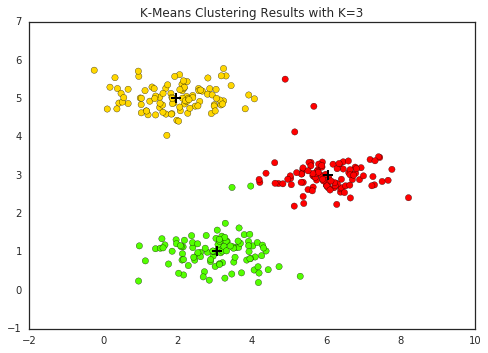

In [8]:
plt.scatter(X1[:,0], X1[:,1], s=40, c=km1.labels_, cmap=plt.cm.prism) 
plt.title('K-Means Clustering Results with K=3')
plt.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2);

### Image compression with K-means

In [9]:
img = plt.imread('data/bird_small.png')
img_shape = img.shape
img_shape

(128, 128, 3)

In [10]:
A = img/255

In [11]:
AA = A.reshape(128*128,3)
AA.shape

(16384, 3)

In [12]:
km2 = KMeans(16)
km2.fit(AA)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=16, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [13]:
B = km2.cluster_centers_[km2.labels_].reshape(img_shape[0], img_shape[1], 3)

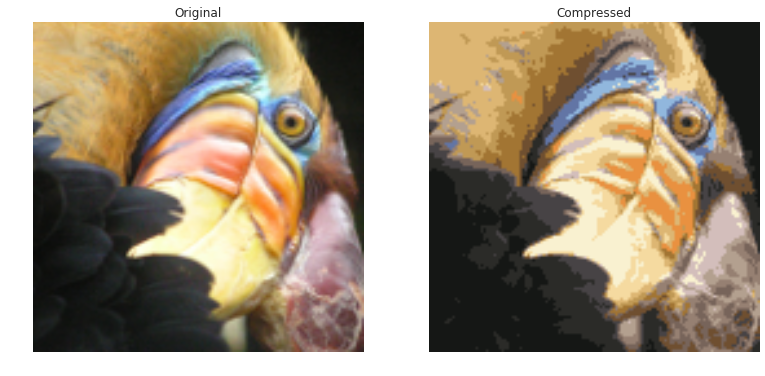

In [14]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,9))
ax1.imshow(img)
ax1.set_title('Original')
ax2.imshow(B*255)
ax2.set_title('Compressed')

for ax in [ax1, ax2]:
    ax.axis('off')

### PCA on example data set

In [15]:
data2 = loadmat('data/ex7data1.mat')
data2.keys()

dict_keys(['__globals__', '__header__', '__version__', 'X'])

In [16]:
X2 = data2['X']
print('X2:', X2.shape)

X2: (50, 2)


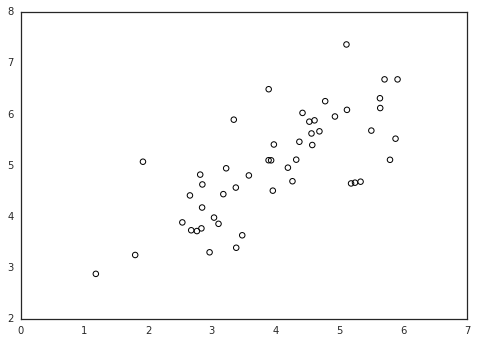

In [17]:
plt.scatter(X2[:,0], X2[:,1], s=30, facecolors='None', linewidth=1);